In [219]:
#No investment advice!
#video instructions: https://youtu.be/t4jrCnrpgdw
#& PartII: https://youtu.be/hTfja2lu5zY

In [220]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize##### imp.******
from scipy.optimize import Bounds

In [221]:
tickers = ['^GSPC','GC=F','TSLA','MMM']

In [222]:
df = yf.download(tickers,start='2010-01-01')['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [223]:
ret_df = np.log(df/df.shift(1)) #daily log returns

In [224]:
ret_df

Ticker,GC=F,MMM,TSLA,^GSPC
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.000358,-0.006283,NaN,0.003111
2010-01-06,0.015795,0.014082,NaN,0.000545
2010-01-07,-0.002468,0.000717,NaN,0.003993
2010-01-08,0.004491,0.007021,NaN,0.002878
...,...,...,...,...
2024-08-26,0.003701,0.015285,-0.032803,-0.003159
2024-08-27,-0.000675,-0.003419,-0.018939,0.001594
2024-08-28,-0.005980,0.001597,-0.016677,-0.005994


In [225]:
ret_df.mean()

Ticker
GC=F     0.000237
MMM      0.000298
TSLA     0.001363
^GSPC    0.000433
dtype: float64

<Axes: xlabel='Date'>

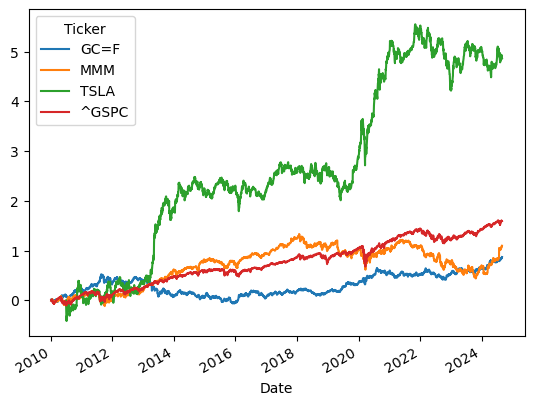

In [226]:
ret_df.cumsum().plot()

In [227]:
W = np.ones(len(ret_df.columns))/ np.ones(len(ret_df.columns)).sum() ##equal weights vector*****

In [228]:
ret_df.mean().dot(W)   #### Expected return

0.0005826735925791849

In [229]:
W.dot(ret_df.cov().dot(W))  #portfolio variance OR W.T.dot(ret_df.cov().dot(W)) (Transpose)*****

0.00015824182230761723

In [230]:
W.dot(ret_df.cov().dot(W)) ** (1/2) #Risk / standard deviation

0.01257942058711836

In [231]:
########### Optimisation of portfolio weights********

In [232]:
def sharpe_pf(W, returns):
    pf_risk = (W.dot(returns.cov()).dot(W)) ** 0.5
    SR = W.T.dot(returns.mean()) / pf_risk
    return -SR #### minus SR ; minimize *****

In [293]:
sharpe_pf(W,ret_df)

-0.04631958908948932

In [295]:
cons = ({"type":"eq", "fun": lambda x: np.sum(x)-1})  ####constraint ; type -> equality (=0) or inequality ; lambda-> anonymous; on the fly

In [297]:
res = minimize(sharpe_pf,W,ret_df,bounds=Bounds(0,1),constraints = cons) # W-> initial guess

In [299]:
res ### x-> optimized weights

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.050460985708449625
       x: [ 3.913e-01  0.000e+00  1.319e-01  4.767e-01]
     nit: 13
     jac: [-9.391e-05  5.334e-03  3.899e-05  6.630e-05]
    nfev: 66
    njev: 13

In [301]:
opt_W = res['x']

<Axes: xlabel='Date'>

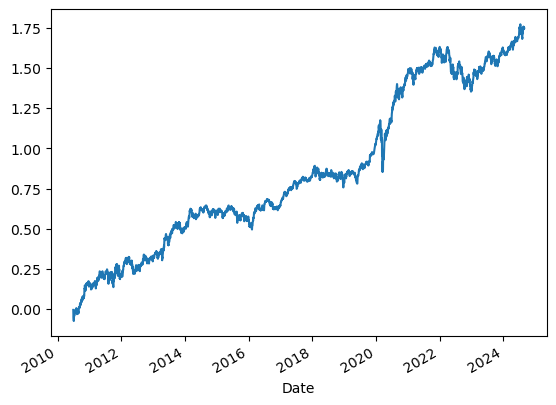

In [303]:
ret_df.dot(opt_W).cumsum().plot()

In [305]:
ret_df.dot(opt_W).cumsum()

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2024-08-26    1.752602
2024-08-27    1.750599
2024-08-28    1.743201
2024-08-29    1.747368
2024-08-30         NaN
Length: 3691, dtype: float64

In [307]:
ret_df.dot(W).cumsum()

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2024-08-26    2.130968
2024-08-27    2.125608
2024-08-28    2.118845
2024-08-29    2.124392
2024-08-30         NaN
Length: 3691, dtype: float64

In [309]:
sharpe_pf(opt_W,ret_df)

-0.050460985708449625

In [311]:
sharpe_pf(W,ret_df)

-0.04631958908948932

In [313]:
1-np.arange(0,1,0.01) #counter-weights

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [289]:
sharpes=[]

for w in np.arange(0,1,0.01):
    weights = w,1-w
    weights = np.array(weights)
    print(weights)
    sharpes.append(sharpe_pf(weights,ret_df))

[0. 1.]


ValueError: shapes (2,) and (4,4) not aligned: 2 (dim 0) != 4 (dim 0)

In [209]:
pd.Series(sharpes)

Series([], dtype: object)

In [211]:
pd.Series(sharpes).plot()

TypeError: no numeric data to plot

In [121]:
pd.Series(sharpes).nsmallest(1)

38   -0.045046
dtype: float64

In [125]:
np.arange(0,1,0.01)[38] #imp....****

0.38

In [315]:
#####splitting the dataset

In [317]:
train = ret_df[:int(len(ret_df) * 0.7)]

In [319]:
test = ret_df[int(len(ret_df) * 0.7):]

In [133]:
ret_df.dot(opt_W).std()

0.007949709765156373

In [291]:
res_train = minimize(sharpe_pf,W,train,bounds=Bounds(0,1),constraints = cons)

ValueError: shapes (4,) and (2,2) not aligned: 4 (dim 0) != 2 (dim 0)

In [139]:
test.dot(res_train['x']).cumsum()

Date
2020-04-08    0.021460
2020-04-09    0.045738
2020-04-13    0.041064
2020-04-14    0.062712
2020-04-15    0.042375
                ...   
2024-08-26    0.624039
2024-08-27    0.624809
2024-08-28    0.618821
2024-08-29    0.622364
2024-08-30         NaN
Length: 1108, dtype: float64

In [147]:
test.dot(W).cumsum()

Date
2020-04-08    0.016925
2020-04-09    0.044933
2020-04-13    0.042326
2020-04-14    0.060782
2020-04-15    0.041176
                ...   
2024-08-26    0.577650
2024-08-27    0.578109
2024-08-28    0.572123
2024-08-29    0.577017
2024-08-30         NaN
Length: 1108, dtype: float64

In [149]:
sharpe_pf(W,test)

-0.068955773076688

In [151]:
sharpe_pf(res_train['x'],test)

-0.06969986868258667

In [153]:
##### bounds to remove negative weights -> short selling ; in a multi-asset portfolio for instance

In [309]:
res_train['x']

array([0.17700387, 0.82299613])

In [310]:
train.std()

GC=F     0.010178
^GSPC    0.009487
dtype: float64

In [311]:
train.mean()

GC=F     0.000099
^GSPC    0.000393
dtype: float64

In [312]:
test.std()

GC=F     0.010349
^GSPC    0.014569
dtype: float64

In [313]:
test.mean()

GC=F     0.000324
^GSPC    0.000370
dtype: float64

In [314]:
opt_W

array([0.32889271, 0.67110729])

In [286]:
sharpes = []

for w in np.arange(0,1,0.01):
    weights = w,1-w
    weights = np.array(weights)
    print(weights)
    sharpes.append(sharpe_pf(weights,ret_df))
    #print(i,e)

[0. 1.]
[0.01 0.99]
[0.02 0.98]
[0.03 0.97]
[0.04 0.96]
[0.05 0.95]
[0.06 0.94]
[0.07 0.93]
[0.08 0.92]
[0.09 0.91]
[0.1 0.9]
[0.11 0.89]
[0.12 0.88]
[0.13 0.87]
[0.14 0.86]
[0.15 0.85]
[0.16 0.84]
[0.17 0.83]
[0.18 0.82]
[0.19 0.81]
[0.2 0.8]
[0.21 0.79]
[0.22 0.78]
[0.23 0.77]
[0.24 0.76]
[0.25 0.75]
[0.26 0.74]
[0.27 0.73]
[0.28 0.72]
[0.29 0.71]
[0.3 0.7]
[0.31 0.69]
[0.32 0.68]
[0.33 0.67]
[0.34 0.66]
[0.35 0.65]
[0.36 0.64]
[0.37 0.63]
[0.38 0.62]
[0.39 0.61]
[0.4 0.6]
[0.41 0.59]
[0.42 0.58]
[0.43 0.57]
[0.44 0.56]
[0.45 0.55]
[0.46 0.54]
[0.47 0.53]
[0.48 0.52]
[0.49 0.51]
[0.5 0.5]
[0.51 0.49]
[0.52 0.48]
[0.53 0.47]
[0.54 0.46]
[0.55 0.45]
[0.56 0.44]
[0.57 0.43]
[0.58 0.42]
[0.59 0.41]
[0.6 0.4]
[0.61 0.39]
[0.62 0.38]
[0.63 0.37]
[0.64 0.36]
[0.65 0.35]
[0.66 0.34]
[0.67 0.33]
[0.68 0.32]
[0.69 0.31]
[0.7 0.3]
[0.71 0.29]
[0.72 0.28]
[0.73 0.27]
[0.74 0.26]
[0.75 0.25]
[0.76 0.24]
[0.77 0.23]
[0.78 0.22]
[0.79 0.21]
[0.8 0.2]
[0.81 0.19]
[0.82 0.18]
[0.83 0.17]
[0.84 0.16]


In [277]:
import pandas as pd

In [282]:
pd.Series(sharpes).nsmallest(1)

33   -0.037359
dtype: float64

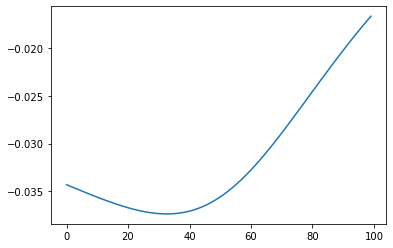

In [279]:
pd.Series(sharpes).plot()